In [1]:
import pickle
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
exp_path = "/Volumes/SanDisk_2T/MeDIL/data/experiments"
sns.set()

In [2]:
def get_old(graph): 
    
    loss_train_old = np.zeros(200)
    loss_valid_old = np.zeros(200)
    for i in range(10):
        file = os.path.join(exp_path, f"experiment_{i}", f"Graph_{graph}", "loss_true.pkl")
        with open(file, "rb") as f:
            loss_true = pickle.load(f)
            loss_train = loss_true[0]
            loss_valid = loss_true[1]
        loss_train_old += loss_train
        loss_valid_old += loss_valid
    loss_train_old /= 10
    loss_valid_old /= 10
    
    return loss_train_old, loss_valid_old

In [3]:
def get_new_1(graph): 
    
    loss_train_new = np.zeros(200)
    loss_valid_new = np.zeros(200)
    for i in range(10, 20):
        file = os.path.join(exp_path, f"experiment_{i}", f"Graph_{graph}", "loss_true.pkl")
        with open(file, "rb") as f:
            loss_true = pickle.load(f)
            loss_train = loss_true[0]
            loss_valid = loss_true[1]
        loss_train_new += loss_train
        loss_valid_new += loss_valid
    loss_train_new /= 10
    loss_valid_new /= 10
    
    return loss_train_new, loss_valid_new

In [4]:
def get_new_2(graph): 
    
    loss_train_new = np.zeros(200)
    loss_valid_new = np.zeros(200)
    for i in range(20, 30):
        file = os.path.join(exp_path, f"experiment_{i}", f"Graph_{graph}", "loss_true.pkl")
        with open(file, "rb") as f:
            loss_true = pickle.load(f)
            loss_train = loss_true[0]
            loss_valid = loss_true[1]
        loss_train_new += loss_train
        loss_valid_new += loss_valid
    loss_train_new /= 10
    loss_valid_new /= 10
    
    return loss_train_new, loss_valid_new

## Graph_a

In [5]:
loss_train_old, loss_valid_old = get_old("a")
loss_train_new_1, loss_valid_new_1 = get_new_1("a")
loss_train_new_2, loss_valid_new_2 = get_new_2("a")

Text(0, 0.5, 'Loss')

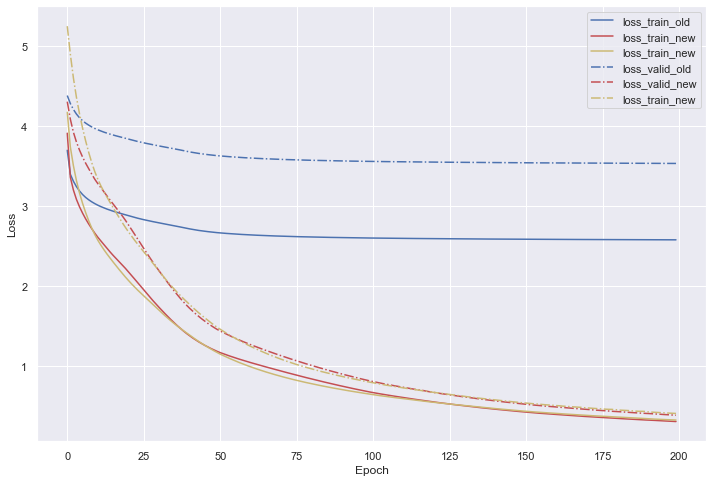

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
ax.plot(loss_train_old, "-b", label="loss_train_old")
ax.plot(loss_train_new_1, "-r", label="loss_train_new")
ax.plot(loss_train_new_2, "-y", label="loss_train_new")
ax.plot(loss_valid_old, "-.b", label="loss_valid_old")
ax.plot(loss_valid_new_1, "-.r", label="loss_valid_new")
ax.plot(loss_valid_new_2, "-.y", label="loss_train_new")
ax.legend()
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

## Graph_b

In [7]:
loss_train_old, loss_valid_old = get_old("b")
loss_train_new_1, loss_valid_new_1 = get_new_1("b")
loss_train_new_2, loss_valid_new_2 = get_new_2("b")

Text(0, 0.5, 'Loss')

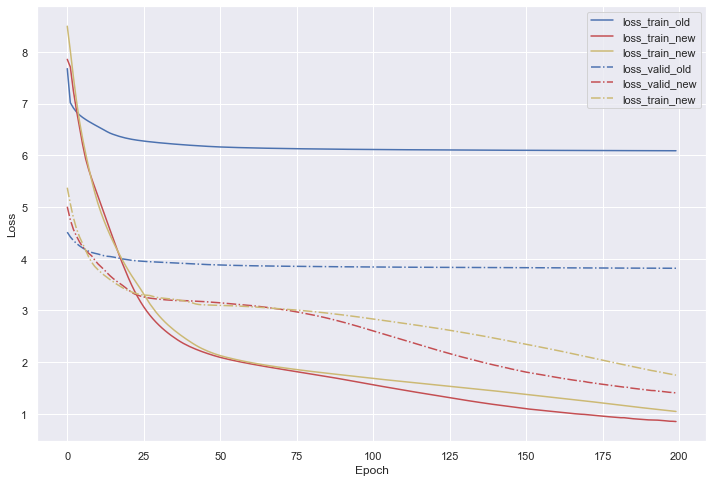

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
ax.plot(loss_train_old, "-b", label="loss_train_old")
ax.plot(loss_train_new_1, "-r", label="loss_train_new")
ax.plot(loss_train_new_2, "-y", label="loss_train_new")
ax.plot(loss_valid_old, "-.b", label="loss_valid_old")
ax.plot(loss_valid_new_1, "-.r", label="loss_valid_new")
ax.plot(loss_valid_new_2, "-.y", label="loss_train_new")
ax.legend()
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

## Graph_c

In [9]:
loss_train_old, loss_valid_old = get_old("c")
loss_train_new_1, loss_valid_new_1 = get_new_1("c")
loss_train_new_2, loss_valid_new_2 = get_new_2("c")

Text(0, 0.5, 'Loss')

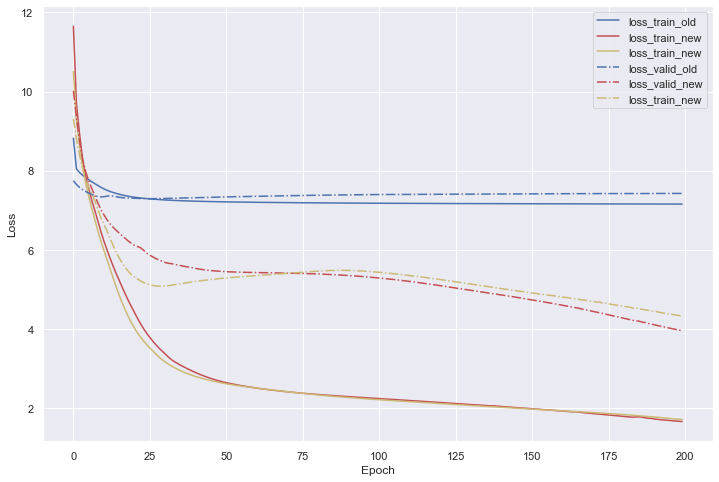

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
ax.plot(loss_train_old, "-b", label="loss_train_old")
ax.plot(loss_train_new_1, "-r", label="loss_train_new")
ax.plot(loss_train_new_2, "-y", label="loss_train_new")
ax.plot(loss_valid_old, "-.b", label="loss_valid_old")
ax.plot(loss_valid_new_1, "-.r", label="loss_valid_new")
ax.plot(loss_valid_new_2, "-.y", label="loss_train_new")
ax.legend()
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")